In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

C:\Users\64800\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.decomposition import NMF

C:\Users\64800\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\64800\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
books = pd.read_csv('New_Books.csv')
users = pd.read_csv('New_Users.csv')
ratings = pd.read_csv('New_Ratings.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Description,Page Count,Genre,Average Rating,Rating Count
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Originally published: Handbook of classical my...,393.0,Social Science\n,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",432.0,Fiction\n,4.0,18.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"“The best-researched, best-written account [of...",753.0,History\n,4.0,1.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"The fascinating, true story of the world's dea...",330.0,Social Science\n,4.0,15.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,A look at the incredibly well-preserved ancien...,240.0,History\n,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0771594348,Taste of Quebec,Julian Armstrong,1990,Macmillan of Canada,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,Canada’s culinary treasure revealed in recipes...,416.0,Cooking\n,NaN,NaN
49988,1895555752,ChrÃ©tien,Lawrence Martin,1995,Lester Pub,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,Seminar paper from the year 2006 in the subjec...,32.0,unknown,NaN,NaN
49989,0771044089,For the Birds: Nature Notes from a Woodland St...,Linda Johns,2000,Random House Inc,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,Linda Johns is for the birds – in the best pos...,291.0,Wild birds as pets\n,NaN,NaN
49990,0774806532,"Canada and Quebec: One Country, Two Histories",Robert Bothwell,1998,UBC Press,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,Relations between Canada and Quebec have never...,296.0,History\n,NaN,NaN


In [3]:
users

,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,8,"timmins, ontario, canada",NaN
2,9,"germantown, tennessee, usa",NaN
3,10,"albacete, wisconsin, spain",26.0
4,12,"fort bragg, california, usa",NaN
...,...,...,...
69439,278844,"st. paul, minnesota, usa",28.0
69440,278846,"toronto, ontario, canada",23.0
69441,278849,"georgetown, ontario, canada",23.0
69442,278851,"dallas, texas, usa",33.0


In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276727,0446520802,0
2,276744,038550120X,7
3,276746,0425115801,0
4,276746,0449006522,0
...,...,...,...
575875,276704,0446353957,0
575876,276704,0446605409,0
575877,276704,0743211383,7
575878,276704,080410526X,0


In [5]:
le = preprocessing.LabelEncoder()
ratings['user_id'] = le.fit_transform(ratings['User-ID'])
ratings['book_id'] = le.fit_transform(ratings['ISBN'])

In [6]:
ratings

,User-ID,ISBN,Book-Rating,user_id,book_id
0,276725,034545104X,0,68915,9158
1,276727,0446520802,0,68916,19052
2,276744,038550120X,7,68917,14263
3,276746,0425115801,0,68918,16202
4,276746,0449006522,0,68918,19779
...,...,...,...,...,...
575875,276704,0446353957,0,68913,18783
575876,276704,0446605409,0,68913,19283
575877,276704,0743211383,7,68913,32874
575878,276704,080410526X,0,68913,35650


In [7]:
matrix = ratings[['user_id', 'book_id', 'Book-Rating']].rename({'Book-Rating': 'rating'}, axis=1)
matrix
X = matrix[['user_id', 'book_id']].values
Y = matrix.rating.values

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

In [10]:
num_user = len(matrix['user_id'].unique())
num_book = len(matrix['book_id'].unique())
sparse_matrix = coo_matrix((train_Y, (train_X[:,0], train_X[:,1])), shape=(num_user, num_book), dtype=np.float32)

# model = NMF(n_components=64, init='nndsvda', max_iter=int(1e5), random_state=0)
# W = model.fit_transform(sparse_matrix)
# H = model.components_
# print(model.reconstruction_err_)
# print(model.n_iter_)

In [11]:
# W_test = coo_matrix(W[test_X[:,0]])
# H_test = coo_matrix(H[:, test_X[:,1]])
# coo_matrix((W_test*H_test.T).sum(1))

In [12]:
# H_test.T.multiply(W_test).sum(1)

In [13]:
# (((W[test_X[:,0]] * H[:, test_X[:,1]].T).sum(1) - test_Y)**2).mean()

In [14]:
# (((W[train_X[:,0]] * H[:, train_X[:,1]].T).sum(1) - train_Y)**2).mean()

In [15]:
device = torch.device('cuda')

In [16]:
# class ContentFilter(nn.Module):
#     def __init__(self, vocal_dim, hidden_dim, latent_dim, dropout=0):
#         super().__init__()

#         self.encoder = nn.Sequential(nn.Linear(vocal_dim, hidden_dim),
#                                      nn.ReLU(),
#                                      nn.Dropout(dropout),
#                                      nn.Linear(hidden_dim, latent_dim)
#                                     )
#         self.decoder = nn.Sequential(nn.ReLU(),
#     #                                  nn.Dropout(dropout),
#                                      nn.Linear(latent_dim, hidden_dim),
#                                      nn.ReLU(),
#                                      nn.Dropout(dropout),
#                                      nn.Linear(hidden_dim, vocal_dim)
#                                     )
    
#     def forward(self, x):
#         embed = self.encoder(x)
#         x_new = self.decoder(embed)
#         return x_new, embed

In [17]:
# content = ContentFilter().to(device)
# criterion_content = nn.MSELoss()
# optimizer_content = torch.optim.Adam(content.parameters())

In [18]:
# def train_content(model, epochs, train_loader, optimizer, criterion, device):
#     train_loss = []
#     model.train()
#     for i in range(epochs):
#         for n, data in enumerate(train_loader):
#             data = data.to(device)
            
#             data_new, embed = model(data)
            
#             loss = criterion(data_new, data)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             train_loss.append(loss)
#             if (n+1)% 10:
#                 print(f'Training loss is {loss.item()}.')
#     return train_loss

In [19]:
class Collaborative(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        x = self.x[index]
        x1 = torch.from_numpy(np.arange(num_user) == x[0]).float()
        x2 = torch.from_numpy(np.arange(num_book) == x[1]).float()
        y = torch.tensor(self.y[index]).float().unsqueeze(0)
        return x1, x2, y

In [20]:
train_set = Collaborative(train_X, train_Y)
train_loader = DataLoader(train_set, batch_size=256, shuffle=True, pin_memory=True)
val_set = Collaborative(test_X, test_Y)
val_loader = DataLoader(val_set, batch_size=256, shuffle=False, pin_memory=True)

In [21]:
class CollaborativeFilter(nn.Module):
    def __init__(self, user_dim, item_dim, latent_dim, hidden_dim, num_classes, dropout=0):
        super().__init__()
        
        self.user_embed = nn.Linear(user_dim, latent_dim)
        self.book_embed = nn.Linear(item_dim, latent_dim)
        
        self.mlp = nn.Sequential(nn.ReLU(),
                                 nn.Dropout(dropout),
                                 nn.Linear(latent_dim*2, hidden_dim),
                                 nn.ReLU(),
                                 nn.Dropout(dropout),
                                 nn.Linear(hidden_dim, num_classes))
        
    def forward(self, x, y):
        user_embed = self.user_embed(x)
        book_embed = self.book_embed(y)
        logit = self.mlp(torch.cat([user_embed, book_embed], dim=1))
        return logit

In [22]:
collaborative = CollaborativeFilter(num_user, num_book, 64, 32, 1)
criterion_collaborative = nn.MSELoss()
optimizer_collaborative = torch.optim.Adam(collaborative.parameters(), lr=1e-3, weight_decay=5e-4)

In [23]:
def train_collaborative(model, epochs, train_loader, val_loader, optimizer, criterion, device):
    train_loss_iteration = []
    train_loss_epoch = []
    
    val_loss_iteration = []
    val_loss_epoch = []
    
    model.to(device)
    model.train()
    
    no_improve = 0
    for i in range(epochs):
        print(f'Epoch {i+1}:')
        train_loss = []
        val_loss = []
        for n, (x1, x2, target) in enumerate(train_loader):
            x1 = x1.to(device)
            x2 = x2.to(device)
            target = target.to(device)
            
            output = model(x1, x2)
            
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.detach().cpu())
            if (n+1)% 100 == 0:
                print(f'Batch [{n+1}/{len(train_loader)}], Training loss is {np.mean(train_loss).item()}.')
        
        train_loss_iteration.extend(train_loss)
        train_loss_epoch.append(np.mean(train_loss).item())
        
        model.eval()
        with torch.no_grad():
            for m, (x1, x2, target) in enumerate(val_loader):
                x1 = x1.to(device)
                x2 = x2.to(device)
                target = target.to(device)

                output = model(x1, x2)

                loss = criterion(output, target)

                val_loss.append(loss.cpu())

                if (m+1)% 100 == 0:
                    print(f'Batch [{m+1}/{len(val_loader)}], Validation loss is {np.mean(val_loss).item()}.')
        
        val_loss_iteration.extend(val_loss)
        
        model.train()
        
        
        if i == 0:
            torch.save(model.state_dict(), 'collaborative.pth')
        else:
            if np.mean(val_loss) <= min(val_loss_epoch):
                torch.save(model.state_dict(), 'collaborative.pth')
                no_improve = 0
            else:
                no_improve += 1
        
        val_loss_epoch.append(np.mean(val_loss).item()) 
        
        if no_improve == 5:
            break
        
    return train_loss_iteration, train_loss_epoch, val_loss_iteration, val_loss_epoch

In [24]:
num_epoch = 5
train_loss_iteration, train_loss_epoch, val_loss_iteration, val_loss_epoch = train_collaborative(collaborative, num_epoch, train_loader, val_loader, optimizer_collaborative, criterion_collaborative, device)

Epoch 1:
Batch [100/1800], Training loss is 19.426776885986328.
Batch [200/1800], Training loss is 16.783174514770508.
Batch [300/1800], Training loss is 15.627272605895996.
Batch [400/1800], Training loss is 14.913857460021973.
Batch [500/1800], Training loss is 14.441862106323242.
Batch [600/1800], Training loss is 14.097410202026367.
Batch [700/1800], Training loss is 13.856493949890137.
Batch [800/1800], Training loss is 13.663398742675781.
Batch [900/1800], Training loss is 13.508678436279297.
Batch [1000/1800], Training loss is 13.377894401550293.
Batch [1100/1800], Training loss is 13.268067359924316.
Batch [1200/1800], Training loss is 13.17135238647461.
Batch [1300/1800], Training loss is 13.088479995727539.
Batch [1400/1800], Training loss is 13.024312019348145.
Batch [1500/1800], Training loss is 12.960526466369629.
Batch [1600/1800], Training loss is 12.903275489807129.
Batch [1700/1800], Training loss is 12.849456787109375.
Batch [1800/1800], Training loss is 12.8064365386

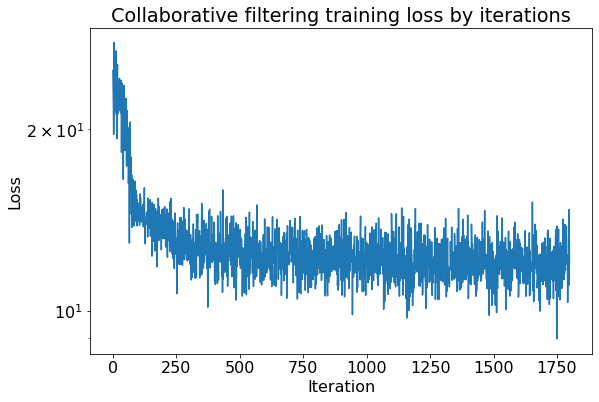

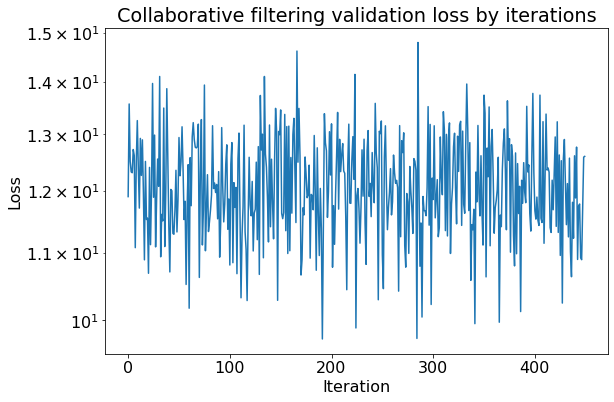

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(9,6))
plt.title('Collaborative filtering training loss by iterations')
plt.plot(train_loss_iteration[:450*4], label='Train_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

plt.figure(figsize=(9,6))
plt.title('Collaborative filtering validation loss by iterations')
plt.plot(val_loss_iteration[:450], label='Val_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
# plt.legend()
plt.yscale('log')
plt.show()

In [26]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=False, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, pin_memory=True)

collaborative.load_state_dict(torch.load('collaborative.pth'))
collaborative.to(device)

all_embed = []
all_data = []
collaborative.eval()
with torch.no_grad():
    for n, (_ , data, _) in enumerate(train_loader):
        all_data.append(np.where(data.cpu() == 1)[1])
        data = data.to(device)
        embed = collaborative.book_embed(data)
        all_embed.append(embed.cpu())
    for m, (_ , data, _) in enumerate(val_loader):
        all_data.append(np.where(data.cpu() == 1)[1])
        data = data.to(device)
        embed = collaborative.book_embed(data)
        all_embed.append(embed.cpu())
datas = np.hstack(all_data)
embeds = np.vstack(all_embed)

TypeError: 'int' object is not callable

In [28]:
embed_dict = {item[0]: item[1] for item in zip(datas, embeds)}

In [11]:
books['book_id'] = np.arange(len(books))
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Description,Page Count,Genre,Average Rating,Rating Count,book_id
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Originally published: Handbook of classical my...,393.0,Social Science\n,NaN,NaN,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",432.0,Fiction\n,4.0,18.0,1
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,"“The best-researched, best-written account [of...",753.0,History\n,4.0,1.0,2
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"The fascinating, true story of the world's dea...",330.0,Social Science\n,4.0,15.0,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,A look at the incredibly well-preserved ancien...,240.0,History\n,4.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0771594348,Taste of Quebec,Julian Armstrong,1990,Macmillan of Canada,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,http://images.amazon.com/images/P/0771594348.0...,Canada’s culinary treasure revealed in recipes...,416.0,Cooking\n,NaN,NaN,49987
49988,1895555752,ChrÃ©tien,Lawrence Martin,1995,Lester Pub,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,http://images.amazon.com/images/P/1895555752.0...,Seminar paper from the year 2006 in the subjec...,32.0,unknown,NaN,NaN,49988
49989,0771044089,For the Birds: Nature Notes from a Woodland St...,Linda Johns,2000,Random House Inc,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,http://images.amazon.com/images/P/0771044089.0...,Linda Johns is for the birds – in the best pos...,291.0,Wild birds as pets\n,NaN,NaN,49989
49990,0774806532,"Canada and Quebec: One Country, Two Histories",Robert Bothwell,1998,UBC Press,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,http://images.amazon.com/images/P/0774806532.0...,Relations between Canada and Quebec have never...,296.0,History\n,NaN,NaN,49990


In [12]:
match = pd.merge(books, ratings, on='ISBN')[['ISBN', 'user_id', 'Book-Title', 'book_id_x', 'book_id_y', 'Book-Rating']].drop_duplicates()
match

,ISBN,user_id,Book-Title,book_id_x,book_id_y,Book-Rating
0,0195153448,0,Classical Mythology,0,5031,0
1,0002005018,1,Clara Callan,1,13,5
2,0002005018,3518,Clara Callan,1,13,0
3,0002005018,3617,Clara Callan,1,13,8
4,0002005018,12446,Clara Callan,1,13,0
...,...,...,...,...,...,...
575875,0771594348,8849,Taste of Quebec,49987,34469,0
575876,1895555752,8849,ChrÃ©tien,49988,45742,0
575877,0771044089,8849,For the Birds: Nature Notes from a Woodland St...,49989,34433,0
575878,0774806532,8849,"Canada and Quebec: One Country, Two Histories",49990,34497,0


In [44]:
idx2book = {item[1]: item[0] for item in match[['Book-Title', 'book_id_x']].values}
np.save('idx2book.npy', idx2book)

In [33]:
idx_dict = {item[1]: item[0] for item in match[['book_id_x', 'book_id_y']].values}

In [39]:
embeds = np.vstack([embed_dict[idx_dict[idx]] for idx in list(idx_dict.keys())])

In [40]:
np.save('book_embeds_collaborative.npy', embeds)

In [16]:
match['dict'] = match.apply(lambda row: {row['book_id_x']: row['Book-Rating']}, axis=1)

In [20]:
info_dict = match[['user_id', 'dict']].groupby('user_id')['dict'].apply(list).to_dict()
info_dict

{0: [{0: 0}],
 1: [{1: 5},
  {2: 0},
  {3: 0},
  {4: 0},
  {5: 0},
  {6: 0},
  {7: 0},
  {8: 0},
  {9: 5},
  {10: 0},
  {11: 0},
  {12: 5},
  {13: 5},
  {14: 0},
  {15: 6},
  {16: 6},
  {17: 7}],
 2: [{18: 0}, {19: 6}, {20: 0}],
 3: [{21: 0}],
 4: [{22: 10}],
 5: [{23: 5}, {24: 5}, {25: 6}, {26: 0}],
 6: [{27: 9}, {28: 0}],
 7: [{29: 0}, {7828: 0}, {20107: 3}, {21201: 0}, {22872: 7}, {28517: 6}],
 8: [{30: 7}],
 9: [{31: 0}],
 10: [{32: 7}, {33: 0}, {34: 0}, {35: 0}],
 11: [{36: 0}],
 12: [{37: 10}, {38: 9}],
 13: [{39: 8}, {40: 0}, {41: 0}],
 14: [{42: 0}],
 15: [{43: 0}, {44: 8}, {45: 7}],
 16: [{46: 7}],
 17: [{47: 0}, {48: 0}, {49: 8}, {50: 0}, {51: 0}],
 18: [{52: 9}],
 19: [{53: 3}, {54: 10}, {55: 6}, {56: 9}, {57: 0}, {58: 0}, {59: 0}],
 20: [{60: 7}, {61: 0}, {62: 9}],
 21: [{63: 7}],
 22: [{64: 0}, {65: 7}, {66: 0}, {67: 0}],
 23: [{68: 0}],
 24: [{69: 0}, {70: 8}],
 25: [{71: 10}],
 26: [{72: 5}],
 27: [{73: 0}, {74: 0}, {75: 0}, {76: 5}],
 28: [{77: 0}],
 29: [{78: 8}],
 30:

In [21]:
np.save('info_dict.npy', info_dict)

In [25]:
# Training_loss = [18.434648513793945, 15.903986930847168, 14.793627738952637, 14.129646301269531, 13.729846000671387, 13.43739128112793, 13.179874420166016,
#                  13.005851745605469, 12.86977767944336, 12.75020694732666, 12.648018836975098, 12.5570068359375, 12.480839729309082, 12.421138763427734,
#                  12.353520393371582, 12.297093391418457, 12.252103805541992, 12.209967613220215, 12.166770935058594, 12.130087852478027, 12.097090721130371,
#                  12.070390701293945, 12.045400619506836, 12.021855354309082, 12.0020112991333, 11.974742889404297, 11.946969985961914, 11.923194885253906,
#                  11.905065536499023, 11.883635520935059, 11.867431640625, 11.854269981384277, 11.833562850952148, 11.821514129638672, 11.809325218200684,
                 
#                  11.732461929321289, 11.664230346679688, 11.600993156433105, 11.539779663085938, 11.4798002243042, 11.42519474029541, 11.373246192932129,
#                  11.325397491455078, 11.28296947479248, 11.240740776062012, 11.200357437133789, 11.16395378112793, 11.13054370880127, 11.096929550170898,
#                  11.066015243530273, 11.035425186157227, 11.005870819091797, 10.977783203125, 10.950024604797363, 10.922231674194336, 10.898894309997559,
#                  10.875113487243652, 10.85114860534668, 10.830018997192383, 10.810029983520508, 10.791287422180176, 10.772745132446289, 10.753870964050293,
#                  10.734904289245605, 10.719773292541504, 10.702223777770996, 10.68668270111084, 10.6721830368042, 10.658597946166992, 10.645994186401367,

#                  10.590456008911133, 10.548070907592773, 10.505057334899902, 10.468085289001465, 10.4286470413208, 10.390337944030762, 10.355514526367188,
#                  10.321654319763184, 10.29037857055664, 10.257589340209961, 10.226109504699707, 10.197174072265625, 10.168509483337402, 10.14060115814209,
#                  10.11210823059082, 10.088024139404297, 10.06353759765625, 10.038816452026367, 10.01561164855957, 9.993853569030762, 9.972299575805664,
#                  9.951635360717773, 9.931419372558594, 9.91127872467041, 9.892406463623047, 9.874982833862305, 9.855691909790039, 9.837852478027344,
#                  9.821309089660645, 9.804590225219727, 9.789266586303711, 9.773778915405273, 9.758489608764648, 9.74457836151123, 9.7326021194458,
                 
#                  9.690370559692383, 9.6615571975708, 9.633414268493652, 9.605352401733398, 9.579405784606934, 9.552408218383789, 9.526780128479004,
#                  9.502602577209473, 9.478316307067871, 9.455184936523438, 9.432589530944824, 9.410306930541992, 9.389423370361328, 9.369309425354004,                
#                  9.348838806152344, 9.328307151794434, 9.31003475189209, 9.29174518585205, 9.275084495544434, 9.258281707763672, 9.24156379699707,
#                  9.225382804870605, 9.210018157958984, 9.195221900939941, 9.180344581604004, 9.165213584899902, 9.151102066040039, 9.136996269226074,
#                  9.123411178588867, 9.110818862915039, 9.097339630126953, 9.084517478942871, 9.072610855102539, 9.059731483459473, 9.048890113830566,
                 
#                  9.016252517700195, 8.995293617248535, 8.974306106567383, 8.953861236572266, 8.933792114257812, 8.914857864379883, 8.895804405212402,
#                  8.877571105957031, 8.859086990356445, 8.842634201049805, 8.826251029968262, 8.808662414550781, 8.792581558227539, 8.776450157165527,
#                  8.760824203491211, 8.746407508850098, 8.731766700744629, 8.717439651489258, 8.703685760498047, 8.690279960632324, 8.67719841003418,
#                  8.663939476013184, 8.651799201965332, 8.639089584350586, 8.626869201660156, 8.615068435668945, 8.60324764251709, 8.592072486877441,
#                  8.580668449401855, 8.569962501525879, 8.55905818939209, 8.54926872253418, 8.538335800170898, 8.529088973999023, 8.519381523132324]
# Training_loss

In [26]:
# Validation_loss = [11.285025596618652, 11.324941635131836, 11.309126853942871, 11.319636344909668, 11.321615219116211, 11.302338600158691, 11.30892562866211, 11.309183120727539,
#                    11.355323791503906, 11.409512519836426, 11.447715759277344, 11.482714653015137, 11.513062477111816, 11.525561332702637, 11.547392845153809, 11.562431335449219,
#                    11.634353637695312, 11.69438362121582, 11.746521949768066, 11.794329643249512, 11.839109420776367, 11.870996475219727, 11.90596866607666, 11.9367036819458,
#                    12.0044527053833, 12.04162311553955, 12.076607704162598, 12.10769271850586, 12.139056205749512, 12.162508010864258, 12.188909530639648, 12.211496353149414,
#                    12.26745319366455, 12.30129337310791, 12.335022926330566, 12.365062713623047, 12.39474868774414, 12.417457580566406, 12.441119194030762, 12.463848114013672]
# Validation_loss